# Regresión Lineal

Técnica paramétrica para predecir variables continuas, dependientes, dado un conjunto de variables independientes.


## Supuestos
<ul>
    <li>
        Existe una relación lineal entre las variables independiente y dependiente 
        </li>
            <li>
                No hay correlación entre las variables independientes
                </li>
                    </ul>

Una sola variable independiente
<br>
y = B0 + B1x <br>
y: variable dependiente <br>
x: variable independiente <br>
B1: pendiente, magnitud de cambio <br>
B0: interseccion, valor esperado cuando x=0 <br>

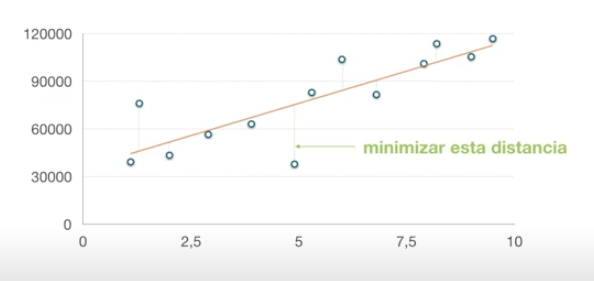

## Minimos Cuadrados
$B1 = \frac{\sum (x_i -xmedia)(y_i-ymedia)} {\sum(x_i-xmedia)^2}$
<br> <br>
$B0 = ymedia-B1*xmedia$

# Ejercicio Dummie

In [11]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

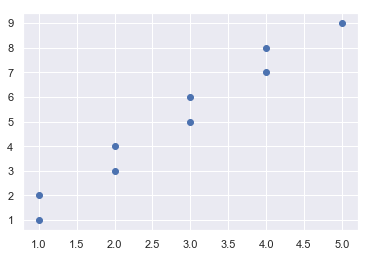

In [12]:
y = np.array([1,2,3,4,5,6,7,8,9])
X1 = np.array([1,1,2,2,3,3,4,4,5])
plt.scatter(X1,y)
plt.show()

In [13]:
X = sm.add_constant(X1)
res_ols = sm.OLS(y, X).fit()
res_ols.params

array([-0.35714286,  1.92857143])

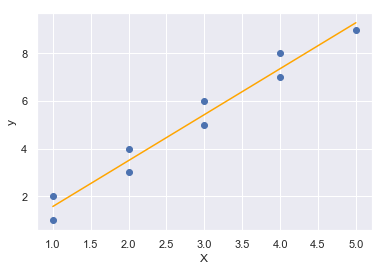

In [14]:
# Incluimos la línea de regresión
plt.scatter(X1,y)

# Definimos la linea de regresion
yhat = res_ols.params[0] + res_ols.params[1]*X1

plt.plot(X1,yhat, c="orange")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Ejercicio Regresión Lineal Simple

In [15]:
# Cargar datos
# SAT: calificacion de estudiantes de preparatoria: Escritura, Lectura y Matematicas
# Se considera uno de los mejores estimadores de capacidad intelectual
# GPA: promedio al salir de la universidad
data = pd.read_csv('SatGpa.csv')
print(data.head(n=5))
print(data.describe())

    SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54
3  1685  2.74
4  1693  2.83
               SAT        GPA
count    84.000000  84.000000
mean   1845.273810   3.330238
std     104.530661   0.271617
min    1634.000000   2.400000
25%    1772.000000   3.190000
50%    1846.000000   3.380000
75%    1934.000000   3.502500
max    2050.000000   3.810000


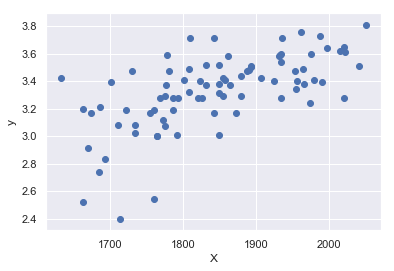

In [16]:
# Definir variables dependientes e independientes
y = data ['GPA']
x1 = data ['SAT']

# Scatter plot 
plt.scatter(x1,y)

plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [17]:
# Agregamos una columna de 1s 
# En statsmodels la interceccion no esta incluida por default asi que hay que agregarla nosotros
# y = b0*1 + b1*x
x = sm.add_constant(x1)
print(x.head(n=5))

# Ajustamos el modelo usando Metodo de Minimos Cuadrados
results = sm.OLS(y,x).fit()
print(results.summary())

   const   SAT
0    1.0  1714
1    1.0  1664
2    1.0  1760
3    1.0  1685
4    1.0  1693
                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           7.20e-11
Time:                        20:10:28   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
results.params

const    0.275040
SAT      0.001656
dtype: float64

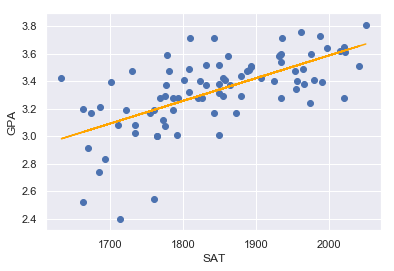

In [19]:
# Graficamos los puntos y su linea de regresión
plt.scatter(x1,y)

# Definimos la linea de regresion
yhat = results.params[0] + results.params[1]*x1

plt.plot(x1,yhat, c='orange', label ='Regression Line')

plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

# Mas bonito con Seaborn

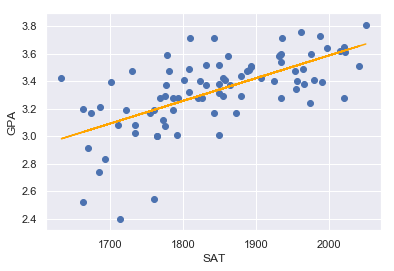

In [20]:
# Necesitamos sobreescribir matplotlib
import seaborn as sns
sns.set()

plt.scatter(x1,y)
yhat = results.params[0] + results.params[1]*x1
plt.plot(x1,yhat, c='orange', label ='Regression Line')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

# Interpretando los Resultados
Tenemos 3 tablas: 
<ol>
    <li> Resumen del Modelo </li>
    <li> Tabla de Coeficientes </li>
    <li> Pruebas Extras </li>
</ol>

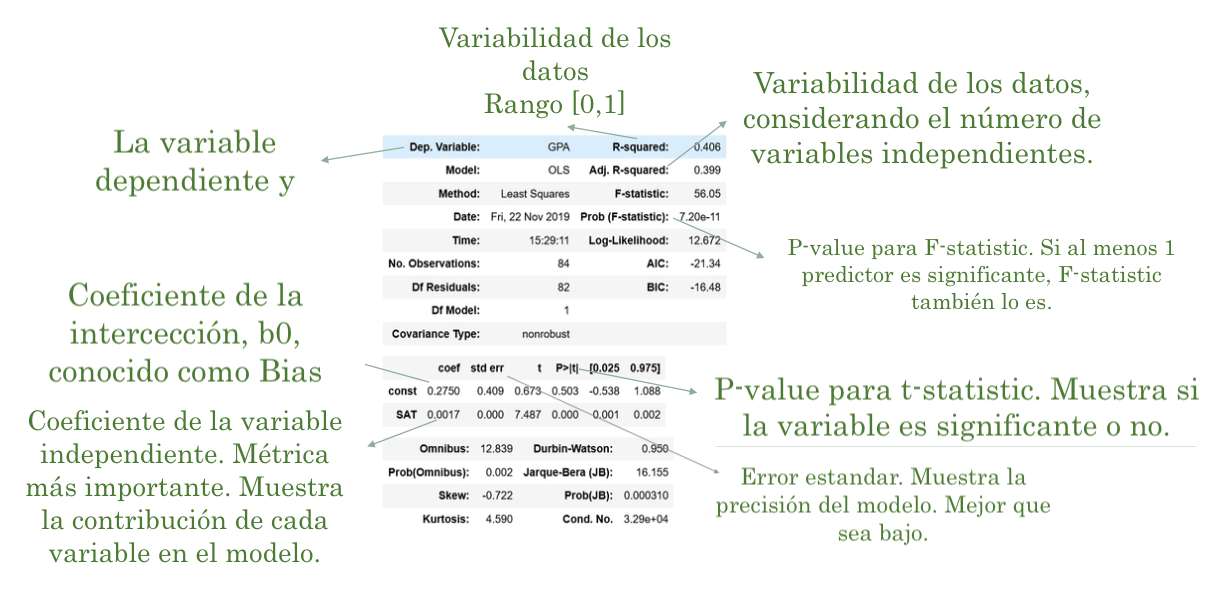

# t-statistic y p-value

Hipótesis Nula: b1 = 0 entonces y=b0
    
p-value es la probabilidad de observar cualquier valor >= |t| asumiendo b1 = 0.
p-value < 0.005 significa que la variable es significativa y hay una asociación entre el predictor y la respuesta.
Rechaza la hipótesis nula.
<br>
Podemos concluir que SAT es una variable significativa para GPA

# Variabilidad

SST (Sum of Squares Total): mide la variabilidad total de los datos
$\sum_{i=1}^n(y_i-\bar{y})^2$
<br>

SSR (Sum of Squares Regression): mide la variabilidad del modelo
$\sum_{i=1}^n(\hat{y}_i-\bar{y})^2$
<br>

SSE (Sum of Squares Error): mide la variabilidad inexplicable
$\sum_{i=1}^n e_i^2$
<br>

SST = SSR + SSE

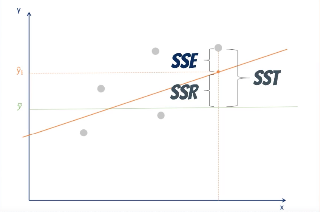

# $R^2$
$R^2 = \frac{SSR}{SST}$
<br>
En este caso $Rˆ2$ explica solo el 41% de variabilidad de los datos, significa que nos esta faltando información (genero o estado marital).